In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import pandas as pd

# Read the CSV file with 'latin1' encoding
book_data = pd.read_csv("book.csv", encoding='latin1')

# Display the first few rows of the dataset
print(book_data.head())


   Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6  


In [5]:
print(book_data.describe())


        Unnamed: 0        User.ID  Book.Rating
count  10000.00000   10000.000000  10000.00000
mean    5000.50000   95321.249800      7.56630
std     2886.89568  117645.703609      1.82152
min        1.00000       8.000000      1.00000
25%     2500.75000    2103.000000      7.00000
50%     5000.50000    3757.000000      8.00000
75%     7500.25000  162052.000000      9.00000
max    10000.00000  278854.000000     10.00000


In [6]:
print(book_data.isnull().sum())


Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64


In [10]:
print("Dataset Information:")
print(book_data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


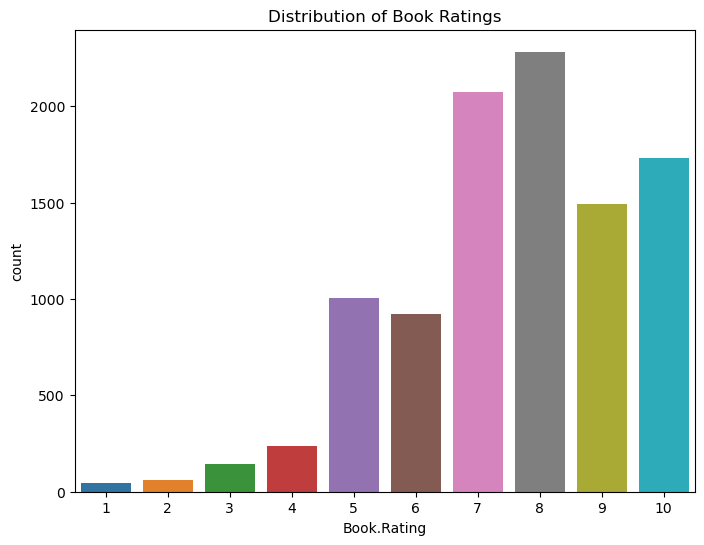

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=book_data, x='Book.Rating')
plt.title('Distribution of Book Ratings')
plt.show()



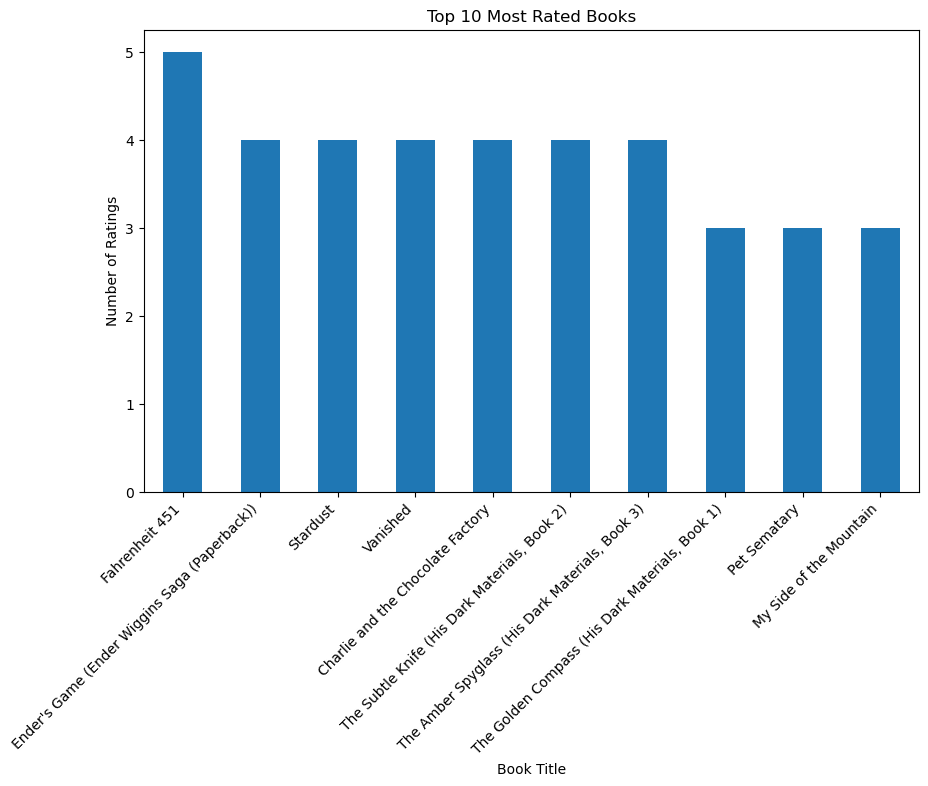

In [8]:
top_rated_books = book_data.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_rated_books.plot(kind='bar')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


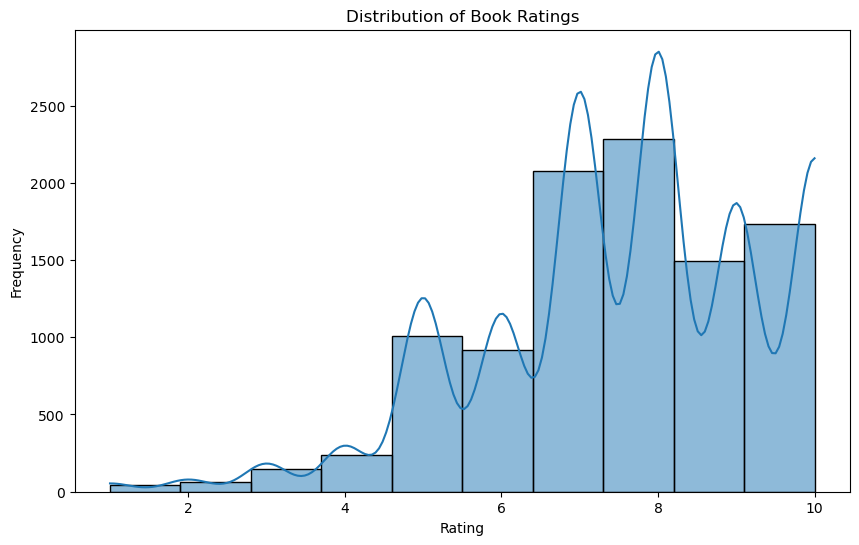

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(book_data['Book.Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [12]:
popular_books = book_data.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Popular Books:")
print(popular_books)



Top 10 Popular Books:
Book.Title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: Book.Rating, dtype: int64


In [13]:
active_users = book_data.groupby('User.ID')['Book.Rating'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Active Users:")
print(active_users)



Top 10 Active Users:
User.ID
3757      523
162052    214
2276      212
4017      156
277427    150
2033      132
278418    117
2110      103
3363       94
1733       91
Name: Book.Rating, dtype: int64


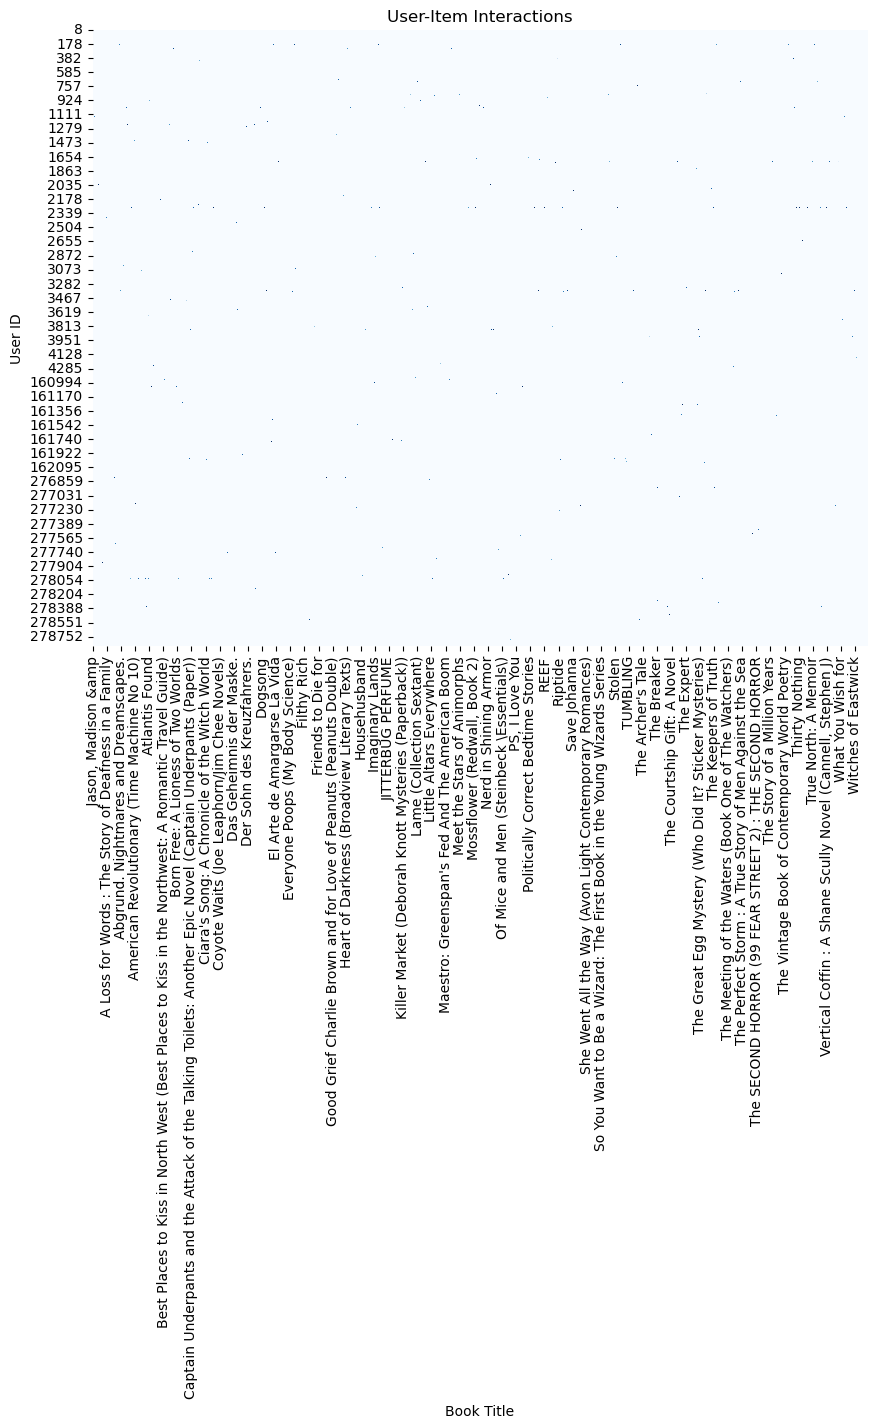

In [14]:
user_item_matrix = book_data.pivot_table(index='User.ID', columns='Book.Title', values='Book.Rating', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(user_item_matrix, cmap='Blues', cbar=False)
plt.title('User-Item Interactions')
plt.xlabel('Book Title')
plt.ylabel('User ID')
plt.show()
